The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Baseline Modelling

1.Classification Models
- LR
- Decision Trees
- Random Forest
- Naive Bayes Classifier

2.Class Imbalance Handler
- Under Sampling
- Over Sampling
- SMOTE
- TomekLinks

3.Metrics
- Accuracy Score
- Confusion Matrix
- Precision Score
- Recall Score
- ROC_AUC
- F1 Score

# Library

In [1]:
import pandas as pd
pd.set_option('display.max_column',None)
import numpy as np

# Import warnings
import warnings
warnings.filterwarnings('ignore')

# Import matplotlib for plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
# feature importance
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
from sklearn.metrics import accuracy_score


# UPLOAD DATA

In [2]:
data = pd.read_csv('creditcard.csv.zip')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# DATA EXPLORATION

### CHECKING DATA IMBALANCE

In [4]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### FURTHER EXPLORATION

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#outliers in 'Amount'

In [7]:
data.shape

(284807, 31)

In [8]:
data['Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
2088.0       1
64100.0      1
42068.0      1
119630.0     1
140344.0     1
Name: Time, Length: 124592, dtype: int64

In [9]:
#check null value
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### PLOT DISTRIBUTION

In [10]:
#create a copy
df = data.copy()

In [11]:
num = data.drop('Class',axis = 1)

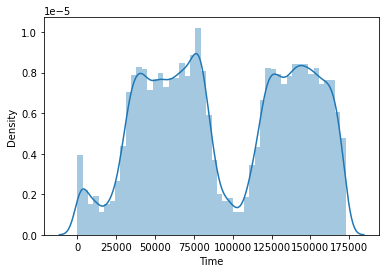

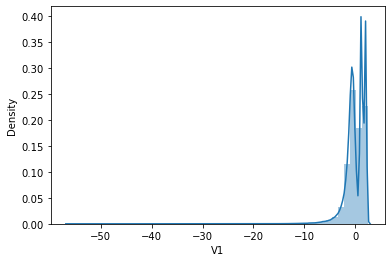

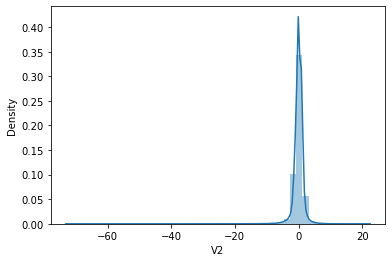

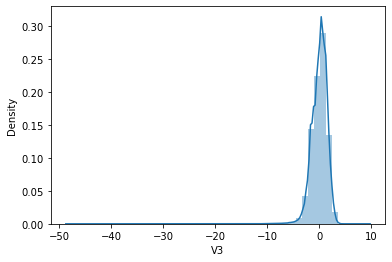

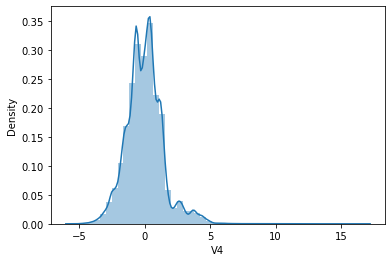

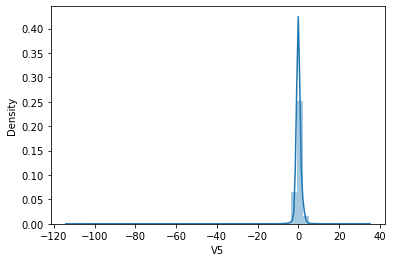

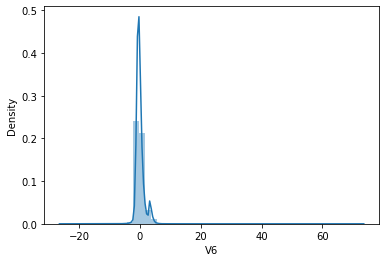

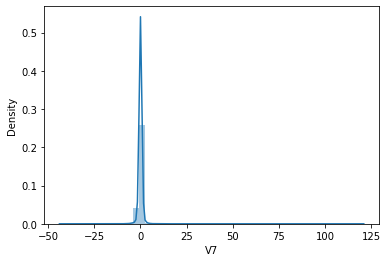

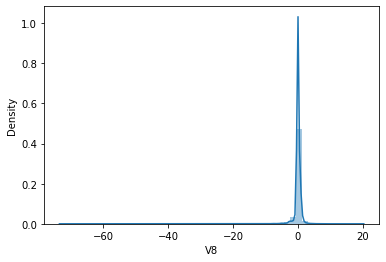

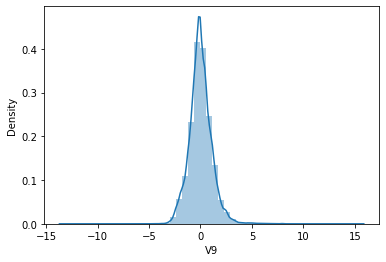

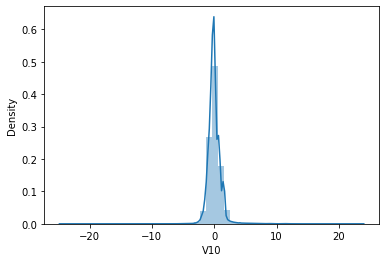

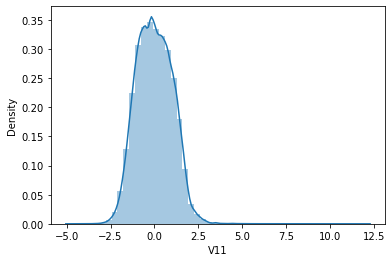

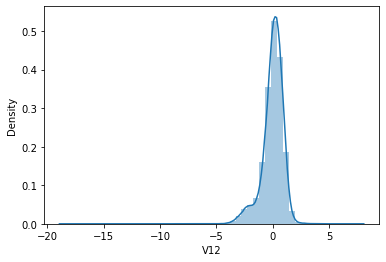

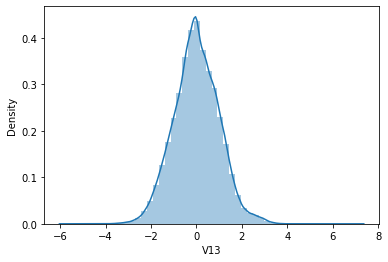

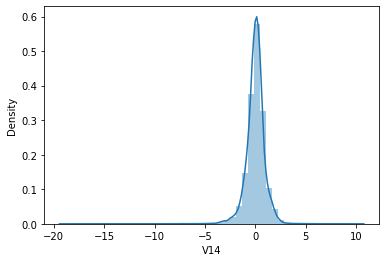

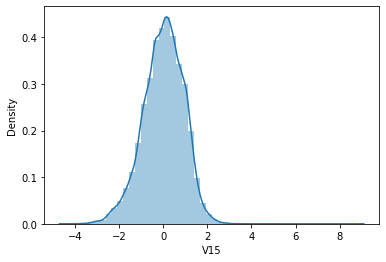

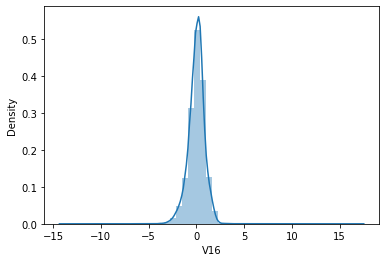

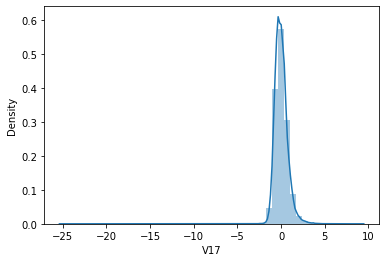

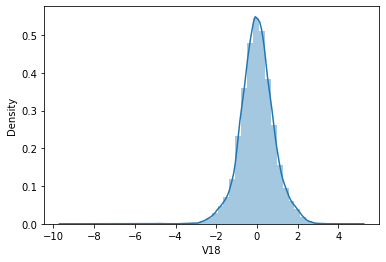

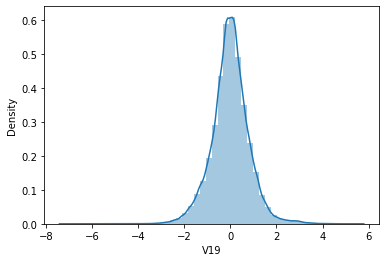

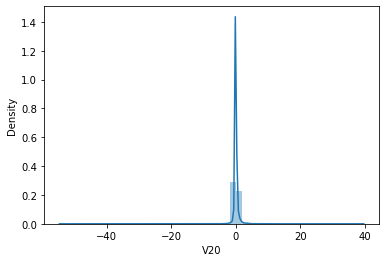

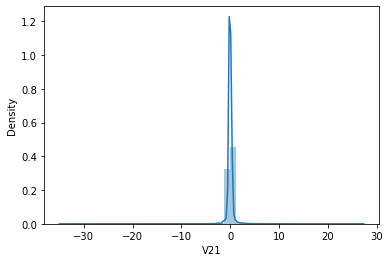

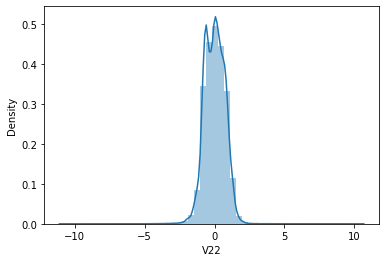

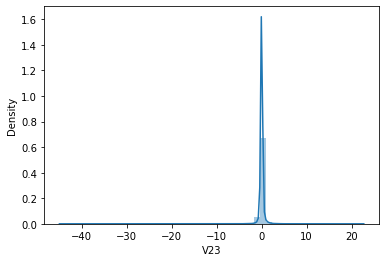

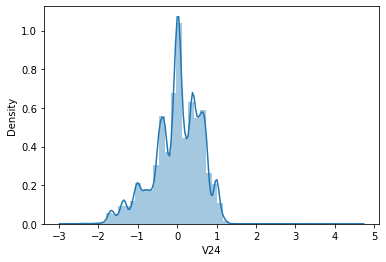

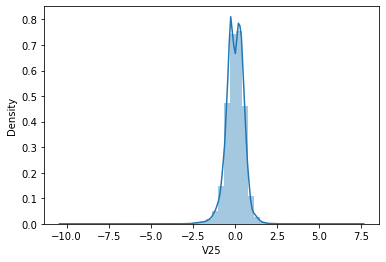

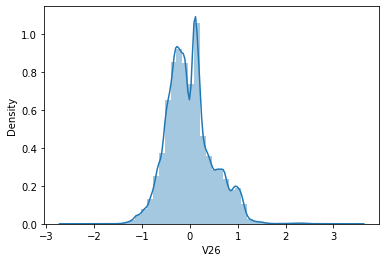

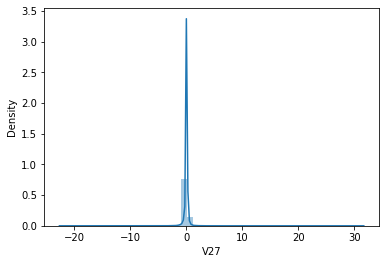

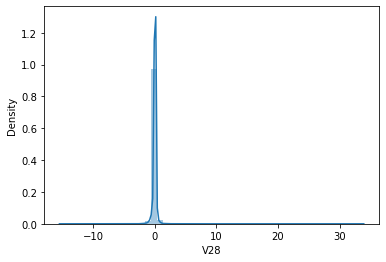

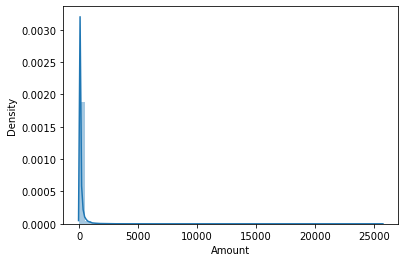

In [12]:
for i in num.columns:
    sns.distplot(num[i])
    plt.show()

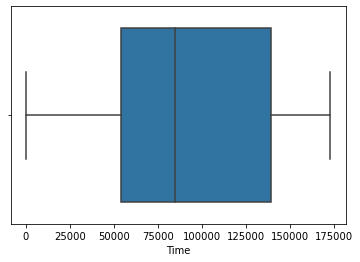

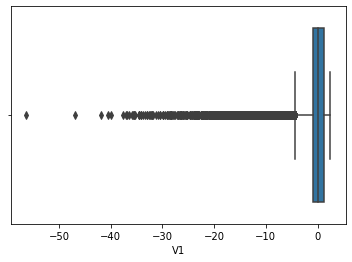

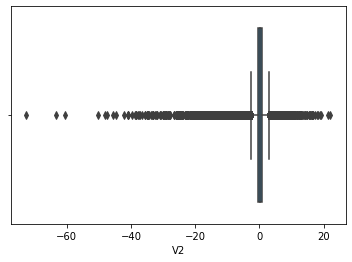

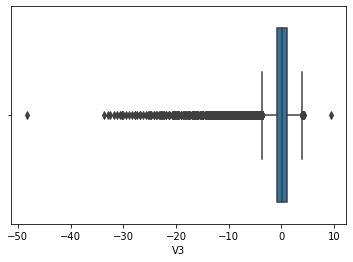

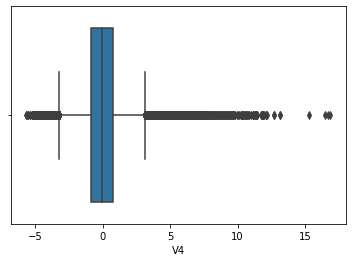

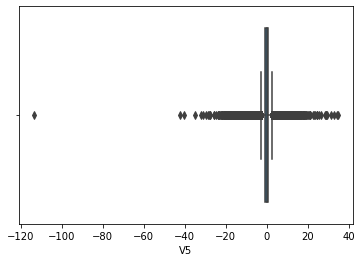

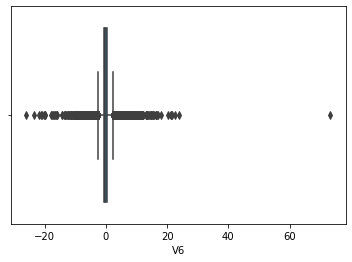

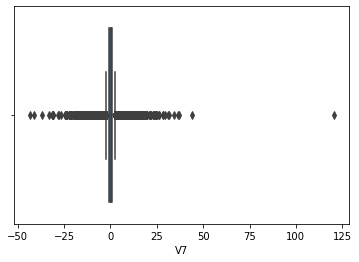

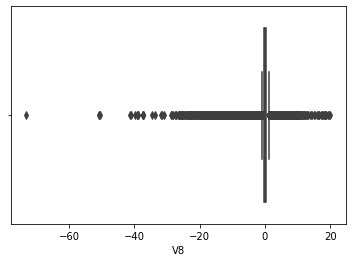

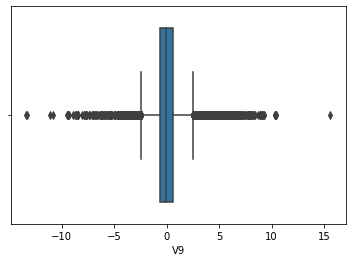

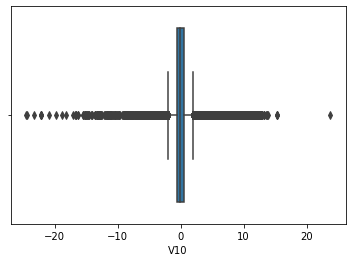

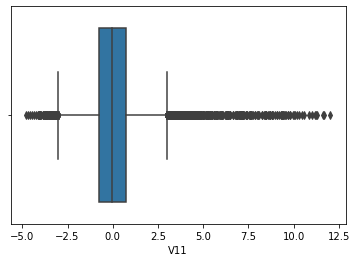

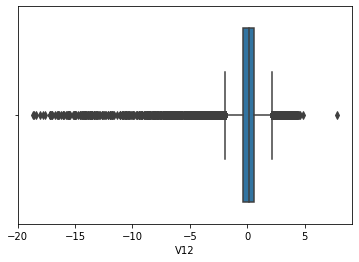

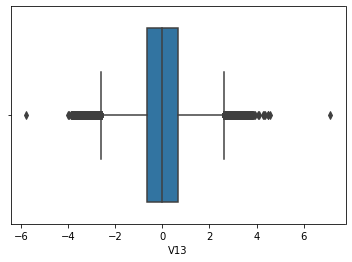

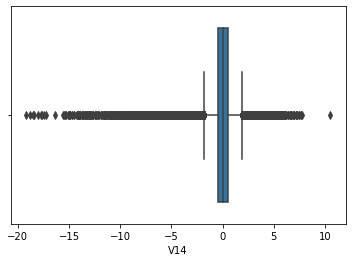

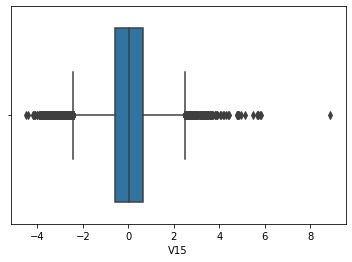

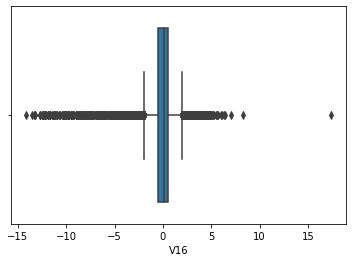

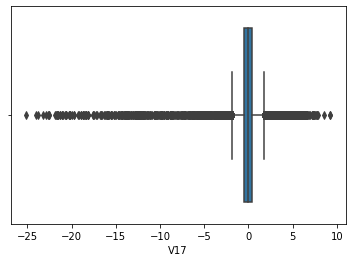

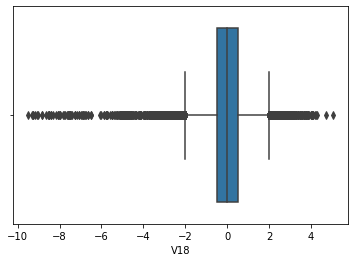

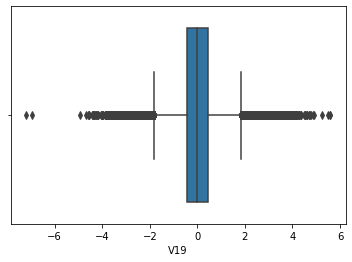

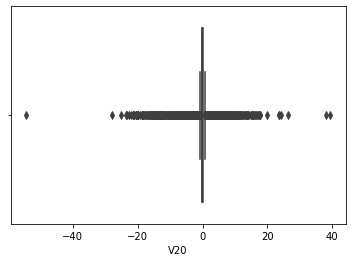

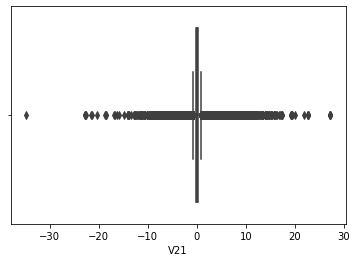

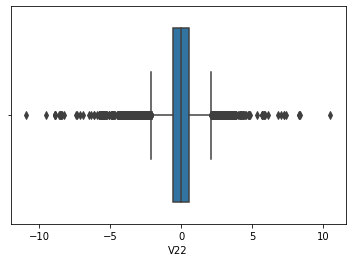

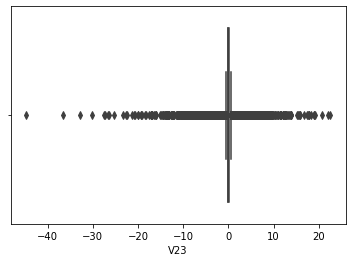

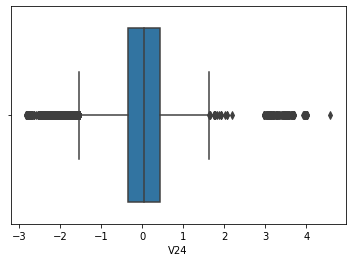

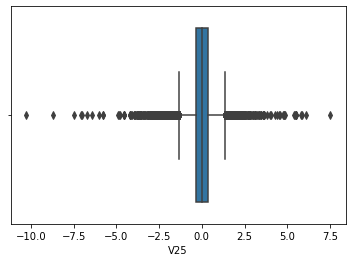

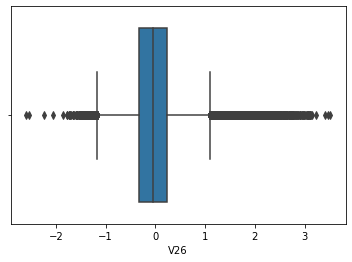

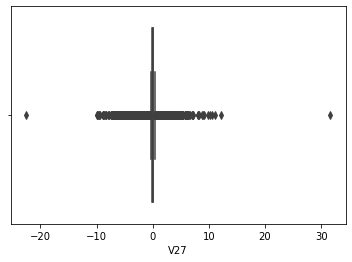

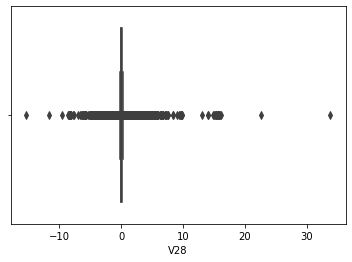

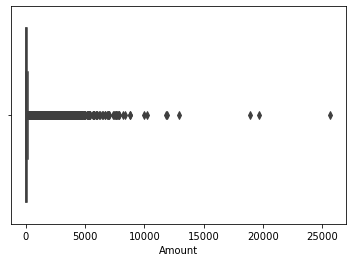

In [13]:
#for i in num.columns:
 #   sns.boxplot(num[i])
  #  plt.show()

In [ ]:
clean_list_lower = ['V1', ]
clean_list_both = ['V2']
clean_list_up = 

### GET THE SKEWNESS

In [12]:
from scipy.stats import kurtosis, skew

In [13]:
def skew_df(df):
    from scipy.stats import skew
    
    cols=list(df.columns)
    
    for col in cols:
        sk=df[col].skew()
        print("the skew of {} is: {}".format(col,sk))
        

In [14]:
skew_df(num)

the skew of Time is: -0.0355676180063216
the skew of V1 is: -3.280667302756041
the skew of V2 is: -4.624865573285336
the skew of V3 is: -2.240155440240421
the skew of V4 is: 0.676292097985747
the skew of V5 is: -2.4259014959520533
the skew of V6 is: 1.826580664998085
the skew of V7 is: 2.553907417429514
the skew of V8 is: -8.521944194777976
the skew of V9 is: 0.5546797719063509
the skew of V10 is: 1.1871405899625276
the skew of V11 is: 0.35650585548882024
the skew of V12 is: -2.2784009354106174
the skew of V13 is: 0.06523345790658323
the skew of V14 is: -1.9951758402683304
the skew of V15 is: -0.308422982135924
the skew of V16 is: -1.100966276051066
the skew of V17 is: -3.844914473870619
the skew of V18 is: -0.25988026809430603
the skew of V19 is: 0.10919175998147107
the skew of V20 is: -2.037155299081398
the skew of V21 is: 3.5929911930778453
the skew of V22 is: -0.21325762284328822
the skew of V23 is: -5.875140340106818
the skew of V24 is: -0.5524993011673045
the skew of V25 is: -0.4

The columns with high skewness that need log/ Box-Cox transformation is 'V1', 'V2', 'V3', 'V7','V8', 'V17','V20','V21','V23','V28','Amount'

### PLOT CORRELATION MATRIX

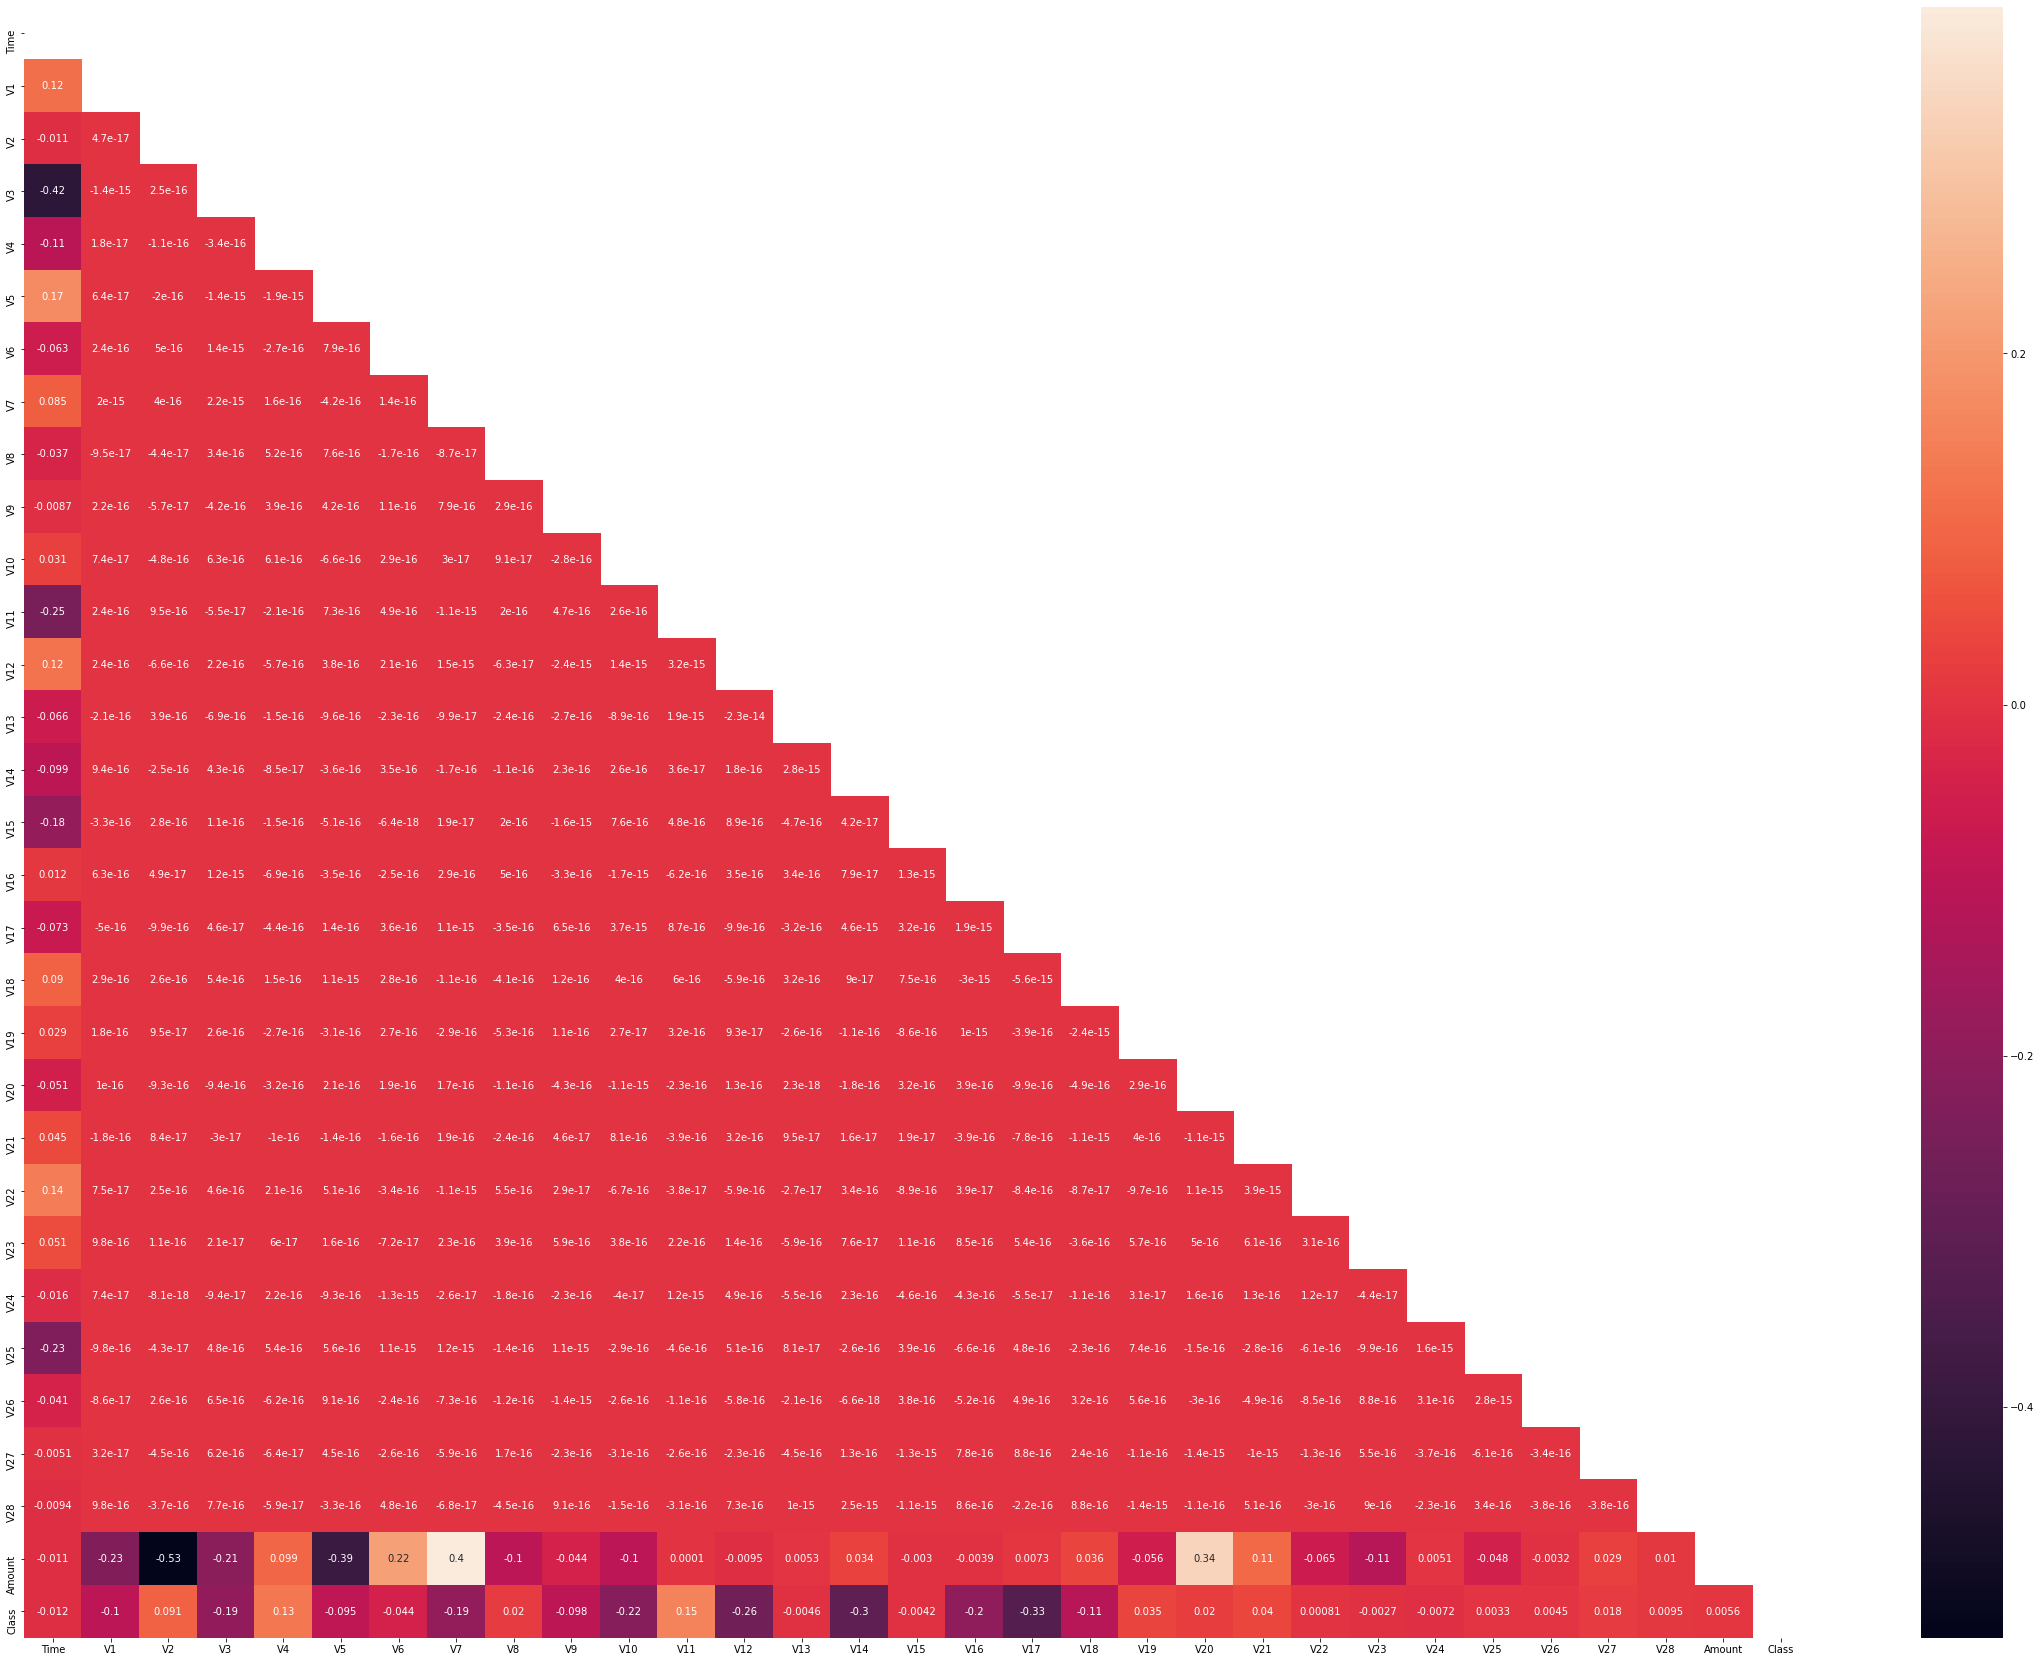

In [18]:
corr_matrix=df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(40,30))
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask = True
ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()

No correlation between independent variables and no correlation to 'Class'

### Checking multicollearity with VIF_scores

In [15]:
# using vif_scores function:
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores['independent_features'] = num.columns
    VIF_Scores['vif_score'] = [variance_inflation_factor(num.values,i) for i in range(num.shape[1])]
    return VIF_Scores

In [16]:
vif_scores(num)

,independent_features,vif_score
0,Time,2.339084
1,V1,1.621694
2,V2,3.869377
3,V3,1.255585
4,V4,1.137944
5,V5,2.753075
6,V6,1.522122
7,V7,2.510165
8,V8,1.097151
9,V9,1.018831


'Amount' has high VIF_scores. Dropping this column will be taken into consideration

## Model for raw data

#### X-Y split

In [17]:
X = num
y = data['Class']

In [18]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [19]:
# splitting data into train and test
def splitting_data(X,y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  return X_train, X_test, y_train, y_test

In [20]:
# scalers functions
def scalers(X_train, X_test, scaler):
    if scaler == 'normalizer':
        transformer = Normalizer().fit(X_train)
        X_train_t = transformer.transform(X_train)
        X_test_t = transformer.transform(X_test) 
    elif scaler == 'standard':
        transformer = StandardScaler().fit(X_train)
        X_train_t = transformer.transform(X_train)
        X_test_t = transformer.transform(X_test)
    elif scaler == 'minmax':
        transformer = MinMaxScaler().fit(X_train)
        X_train_t = transformer.transform(X_train)
        X_test_t = transformer.transform(X_test)
    elif scaler == 'power':
        transformer = PowerTransformer().fit(X_train)
        X_train_t = transformer.transform(X_train)
        X_test_t = transformer.transform(X_test)

    X_train_t = pd.DataFrame(X_train_t, columns = X_train.columns)
    X_test_t = pd.DataFrame(X_test_t, columns = X_test.columns)

    return X_train_t, X_test_t

In [21]:
# sampling functions
def samplings_type(X_train, y_train, samp):
    if samp =='downsampling':
        s = RandomUnderSampler()
    elif samp == 'upsampling':
        s = RandomOverSampler()
    elif  samp == 'tomeklinks':
        s = TomekLinks('majority')

    X_s, y_s = s.fit_sample(X_train, y_train)
    X_train_s = pd.DataFrame(X_s, columns = X_train.columns)
    y_train_s = pd.DataFrame(y_s, columns = ['Class'])

    return X_train_s, y_train_s

In [22]:
# predict function accuracies and kappas
def fit_predict(X_train, X_test, y_train, y_test, model,k=None):
    import sys
    from sklearn.metrics import accuracy_score, precision_score
    if ( model == 'logistic' ):
        classification = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr').fit(X_train, y_train)
    elif ( model == 'decision_tree' ):
        classification = DecisionTreeClassifier().fit(X_train, y_train)
    elif ( model == 'k-nn'):
          classification = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    else:
        print('Incorrect input model')
        sys.exit()

    y_train_pred = classification.predict(X_train)
    y_test_pred  = classification.predict(X_test)

    accuracy_train = round(accuracy_score(y_train, y_train_pred),2)
    accuracy_test  = round(accuracy_score(y_test, y_test_pred),2)

    kappa_train = round(cohen_kappa_score(y_train, y_train_pred),2)
    kappa_test  = round(cohen_kappa_score(y_test, y_test_pred),2)

    return accuracy_train, accuracy_test, kappa_train, kappa_test

In [23]:
# function that returns y_test_predict
def y_predict(X_train, X_test, y_train, y_test, model='logistic'):
    import sys

    if ( model == 'logistic' ):
        classification = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr').fit(X_train, y_train)
        #classification.to_pickle('')
    elif ( model == 'decision_tree' ):
        classification = DecisionTreeClassifier().fit(X_train, y_train)
    elif ( model == 'k-nn' ):
          classification = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    else:
        print('Incorrect input model')
        sys.exit()

    y_train_pred = classification.predict(X_train)
    y_test_pred  = classification.predict(X_test)
    return y_test_pred

In [24]:
# applying scaling, sampling and predicting
def get_scores(X,y, model):
    from sklearn.metrics import precision_score, recall_score
    X_train, X_test, y_train, y_test = splitting_data(X,y)

    my_dict =  {'scaler': [], 'sampling': [], 'precision':[],'recall':[],'accuracy': [], 'kappa': [], 'set': []}

    for scaler in ['normalizer','standard','minmax','power']:
        for sampling in ['downsampling','upsampling','tomeklinks']:

            X_train_t, X_test_t = scalers(X_train, X_test, scaler)
            X_train_s, y_train_s = samplings_type(X_train_t, y_train, sampling)

            accuracy_train, accuracy_test, kappa_train, kappa_test = fit_predict(X_train_s, X_test_t, y_train_s, y_test,model)
            y_pred = y_predict(X_train_s, X_test_t, y_train_s, y_test, model)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)

            my_dict['scaler'].append(scaler)
            my_dict['sampling'].append(sampling)
            my_dict['precision'].append(precision)
            my_dict['recall'].append(recall)
            my_dict['accuracy'].append(accuracy_train)
            my_dict['kappa'].append(kappa_train)
            my_dict['set'].append('train')

            my_dict['scaler'].append(scaler)
            my_dict['sampling'].append(sampling)
            my_dict['precision'].append(precision)
            my_dict['recall'].append(recall)
            my_dict['accuracy'].append(accuracy_test)
            my_dict['kappa'].append(kappa_test)
            my_dict['set'].append('test')

    results = pd.DataFrame(my_dict)
    return results

# PERFORMING DIFFERENT MODEL ON RAW DATA and GET IMPORTANCE FEATURES

In [26]:
# Split train-test set :
X_train, X_test, y_train, y_test = splitting_data(X,y)

#### Logistic Regression

In [59]:
from sklearn.metrics import accuracy_score, precision_score,recall_score
classification = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr').fit(X_train, y_train)
y_train_pred = classification.predict(X_train)
y_test_pred  = classification.predict(X_test)
print('The accuracy of the train set is {}'.format( round(accuracy_score(y_train, y_train_pred),2)))
print('The accuracy of the test set is {}'.format( round(accuracy_score(y_test, y_test_pred),2)))
print('The Kappa score of the train set is {}'.format(round(cohen_kappa_score(y_train, y_train_pred),2)))
print('The Kappa score of the test set is {}'.format(round(cohen_kappa_score(y_test, y_test_pred),2)))
print('The precision score of the model is {}'.format(precision_score(y_test, y_test_pred)))
print('The recall score of the model is {}'.format(recall_score(y_test, y_test_pred)))

The accuracy of the train set is 1.0
The accuracy of the test set is 1.0
The Kappa score of the train set is 0.59
The Kappa score of the test set is 0.58
The precision score of the model is 0.5954198473282443
The recall score of the model is 0.5735294117647058


Feature: 0, Score: -0.00009
Feature: 1, Score: 0.56453
Feature: 2, Score: -0.76794
Feature: 3, Score: -1.08087
Feature: 4, Score: 0.12706
Feature: 5, Score: 0.14368
Feature: 6, Score: -0.06768
Feature: 7, Score: 0.25917
Feature: 8, Score: -0.22174
Feature: 9, Score: -0.73938
Feature: 10, Score: -0.13184
Feature: 11, Score: -0.45131
Feature: 12, Score: 0.46174
Feature: 13, Score: -0.62002
Feature: 14, Score: -1.19213
Feature: 15, Score: -0.20113
Feature: 16, Score: -0.24459
Feature: 17, Score: -0.54617
Feature: 18, Score: 0.05207
Feature: 19, Score: 0.05810
Feature: 20, Score: 0.03050
Feature: 21, Score: 0.13817
Feature: 22, Score: 0.29466
Feature: 23, Score: 0.02321
Feature: 24, Score: -0.04925
Feature: 25, Score: -0.20000
Feature: 26, Score: 0.01623
Feature: 27, Score: -0.06653
Feature: 28, Score: 0.03035
Feature: 29, Score: -0.00737


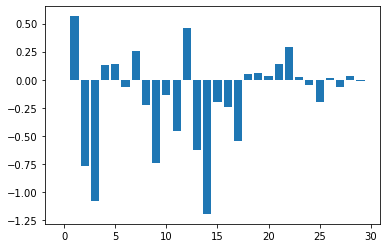

In [33]:
# get the importance feature with Logistic regression
classification = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr').fit(X_train, y_train)
importance = classification.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### K-NN

In [64]:
classification1 = KNeighborsClassifier(n_neighbors= 2).fit(X_train, y_train)
y_train_pred1 = classification1.predict(X_train)
y_test_pred1  = classification1.predict(X_test)
print('The accuracy of the train set is {}'.format( round(accuracy_score(y_train, y_train_pred1),2)))
print('The accuracy of the test set is {}'.format( round(accuracy_score(y_test, y_test_pred1),2)))
print('The Kappa score of the train set is {}'.format(round(cohen_kappa_score(y_train, y_train_pred1),2)))
print('The Kappa score of the test set is {}'.format(round(cohen_kappa_score(y_test, y_test_pred1),2)))
print('The precision score of the model is {}'.format(precision_score(y_test, y_test_pred1)))
print('The recall score of the model is {}'.format(recall_score(y_test, y_test_pred1)))
importance = classification1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The accuracy of the train set is 1.0
The accuracy of the test set is 1.0
The Kappa score of the train set is 0.31
The Kappa score of the test set is 0.21
The precision score of the model is 1.0
The recall score of the model is 0.11764705882352941


#### Decision Tree

In [62]:
classification2 = DecisionTreeClassifier().fit(X_train, y_train)
y_train_pred2 = classification2.predict(X_train)
y_test_pred2  = classification2.predict(X_test)
print('The accuracy of the train set is {}'.format( round(accuracy_score(y_train, y_train_pred2),2)))
print('The accuracy of the test set is {}'.format( round(accuracy_score(y_test, y_test_pred2),2)))
print('The Kappa score of the train set is {}'.format(round(cohen_kappa_score(y_train, y_train_pred2),2)))
print('The Kappa score of the test set is {}'.format(round(cohen_kappa_score(y_test, y_test_pred2),2)))
print('The precision score of the model is {}'.format(precision_score(y_test, y_test_pred2)))
print('The recall score of the model is {}'.format(recall_score(y_test, y_test_pred2)))
importance = classification2.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The accuracy of the train set is 1.0
The accuracy of the test set is 1.0
The Kappa score of the train set is 1.0
The Kappa score of the test set is 0.71
The precision score of the model is 0.6776315789473685
The recall score of the model is 0.7573529411764706


#### AdaBoostClassifier

In [29]:
from sklearn.ensemble import AdaBoostClassifier
classification3 = AdaBoostClassifier().fit(X_train, y_train)
y_train_pred3 = classification3.predict(X_train)
y_test_pred3 = classification3.predict(X_test)
print('The accuracy of the train set is {}'.format( round(accuracy_score(y_train, y_train_pred3),2)))
print('The accuracy of the test set is {}'.format( round(accuracy_score(y_test, y_test_pred3),2)))
print('The Kappa score of the train set is {}'.format(round(cohen_kappa_score(y_train, y_train_pred3),2)))
print('The Kappa score of the test set is {}'.format(round(cohen_kappa_score(y_test, y_test_pred3),2)))
print('The precision score of the model is {}'.format(precision_score(y_test, y_test_pred3)))
print('The recall score of the model is {}'.format(recall_score(y_test, y_test_pred3)))

The accuracy of the train set is 1.0
The accuracy of the test set is 1.0
The Kappa score of the train set is 0.77
The Kappa score of the test set is 0.77
The precision score of the model is 0.819672131147541
The recall score of the model is 0.7352941176470589


In [ ]:
importance = classification3.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
Adaboost is the best model for our raw dataset, we will try to improve the models to give better results

In [32]:
from sklearn.ensemble import RandomForestClassifier
classification4 = RandomForestClassifier().fit(X_train, y_train)
y_train_pre4 = classification4.predict(X_train)
y_test_pre4 = classification4.predict(X_test)
print('The accuracy of the train set is {}'.format( round(accuracy_score(y_train, y_train_pre4),2)))
print('The accuracy of the test set is {}'.format( round(accuracy_score(y_test, y_test_pre4),2)))
print('The Kappa score of the train set is {}'.format(round(cohen_kappa_score(y_train, y_train_pre4),2)))
print('The Kappa score of the test set is {}'.format(round(cohen_kappa_score(y_test, y_test_pre4),2)))
print('The precision score of the model is {}'.format(precision_score(y_test, y_test_pre4)))
print('The recall score of the model is {}'.format(recall_score(y_test, y_test_pre4)))

The accuracy of the train set is 1.0
The accuracy of the test set is 1.0
The Kappa score of the train set is 1.0
The Kappa score of the test set is 0.87
The precision score of the model is 0.9401709401709402
The recall score of the model is 0.8088235294117647


Feature: 0, Score: 0.01064
Feature: 1, Score: 0.01509
Feature: 2, Score: 0.01161
Feature: 3, Score: 0.02307
Feature: 4, Score: 0.03148
Feature: 5, Score: 0.01115
Feature: 6, Score: 0.01319
Feature: 7, Score: 0.02847
Feature: 8, Score: 0.01274
Feature: 9, Score: 0.03704
Feature: 10, Score: 0.05824
Feature: 11, Score: 0.08334
Feature: 12, Score: 0.12387
Feature: 13, Score: 0.01297
Feature: 14, Score: 0.12511
Feature: 15, Score: 0.01112
Feature: 16, Score: 0.05244
Feature: 17, Score: 0.16689
Feature: 18, Score: 0.03696
Feature: 19, Score: 0.01308
Feature: 20, Score: 0.01147
Feature: 21, Score: 0.01984
Feature: 22, Score: 0.00944
Feature: 23, Score: 0.00804
Feature: 24, Score: 0.00902
Feature: 25, Score: 0.01031
Feature: 26, Score: 0.01851
Feature: 27, Score: 0.01280
Feature: 28, Score: 0.01047
Feature: 29, Score: 0.01161


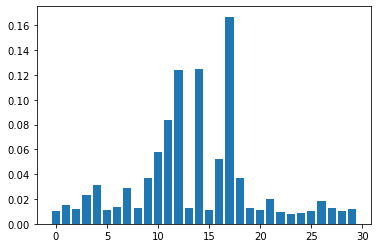

In [35]:
importance = classification4.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The RandomForestClassifier is the best model on raw data. Since we want to minimize False Negative( We predict No Fraud and its wrong prediction), we want a high recall score.
RandomForestClassifier gives the highest score in terms of both Kappa test set and recall score.

# TRYING TO IMPROVE THE MODEL

### Decision 1: remove 'Amount' due to significantly high VIF score

### Decision 2: Dealing with outliers

Create a list of numerical columns with outliers, identified using boxplots